# Perceptrón con Iris

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Datos

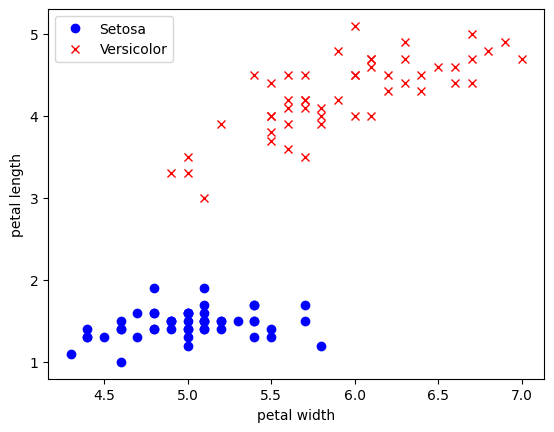

In [2]:
# Importar dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# Obtener las primeras 50 filas (todas setosas) con solo las primeras 2 características (largo y ancho del pétalo)
setosa = np.array(df.iloc[0:50, [0,2]])

# Obtener las filas 50 a 100 (todas versicolor) con solo las primeras 2 características (largo y ancho del pétalo)
versicolor = np.array(df.iloc[50:100, [0,2]])

# Círculos azules denotan setosa y x rojas denotan versicolor
plt.plot(setosa[:, 0], setosa[:, 1], "bo", label="Setosa")
plt.plot(versicolor[:, 0], versicolor[:, 1], "rx", label="Versicolor")
plt.xlabel("petal width")
plt.ylabel("petal length")
plt.legend(loc='upper left')
plt.show()

## Función para graficar el conjunto de datos y la línea de separación

In [3]:
def plot_decision_boundary(X, y, weights, iteration):
    # Gráfico del conjunto de datos
    plt.figure(figsize=(8, 6))

    # Graficar las clases
    setosa = X[y == -1]
    versicolor = X[y == 1]
    plt.plot(setosa[:, 0], setosa[:, 1], "bo", label="Setosa")
    plt.plot(versicolor[:, 0], versicolor[:, 1], "rx", label="Versicolor")

    # Generar el rango de la línea de decisión
    x_values = np.array([min(X[:, 0]) - 1, max(X[:, 0]) + 1])

    # Calcular los puntos de la línea de decisión (w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b) / w2)
    if weights[2] != 0:  # Para evitar la división por cero
        y_values = -(weights[1] * x_values + weights[0]) / weights[2]
        plt.plot(x_values, y_values, label=f'Línea de separación (Iteración {iteration})')

    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend(loc='upper left')
    plt.title(f'Iteración {iteration}')
    plt.show()

# El modelo

Definimos una nueva clase “perceptrón”, inicializando la tasa de aprendizaje (eta) y el número de iteraciones (n_iter). Estos dos valores se denominan hiperparámetros, la tasa de aprendizaje es un valor flotante de 0 a 1, mientras que el número de iteraciones es un entero. El valor óptimo para estas dos variables depende del problema en sí.

**Tasa de aprendizaje (eta)**: la intuición aquí es que si la tasa de aprendizaje es demasiado alta, nuestro modelo se excederá.

**Número de iteraciones (n_iter)**: esta es la cantidad de iteraciones que nuestro algoritmo ejecutará sobre los datos de entrenamiento.

In [4]:
# Clase Perceptron modificada
class Perceptron():
    def __init__(self, eta=0.1, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])]  # Inicializar pesos aleatoriamente
        self.errors_ = []

        # Entrenamiento
        for i in range(self.n_iter):
            errors = 0
            for xi, label in zip(X, y):
                update = self.eta * (label - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            self.errors_.append(errors)

            # Graficar en cada iteración
            plot_decision_boundary(X, y, self.w_, i+1)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Entrenar el perceptrón

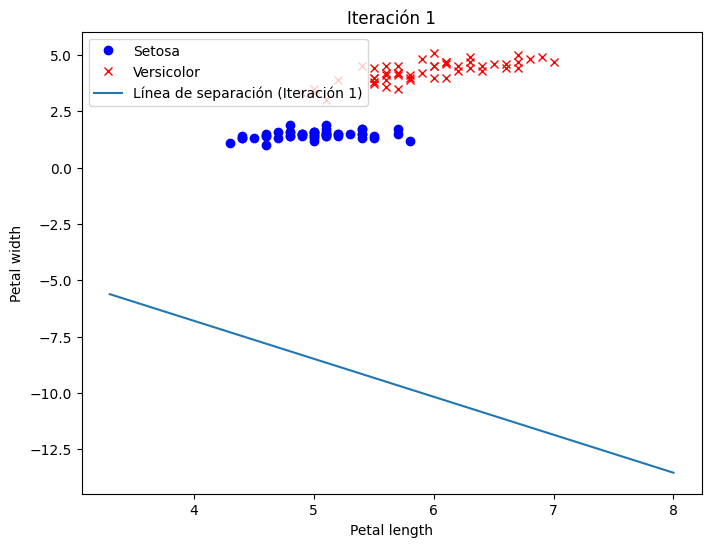

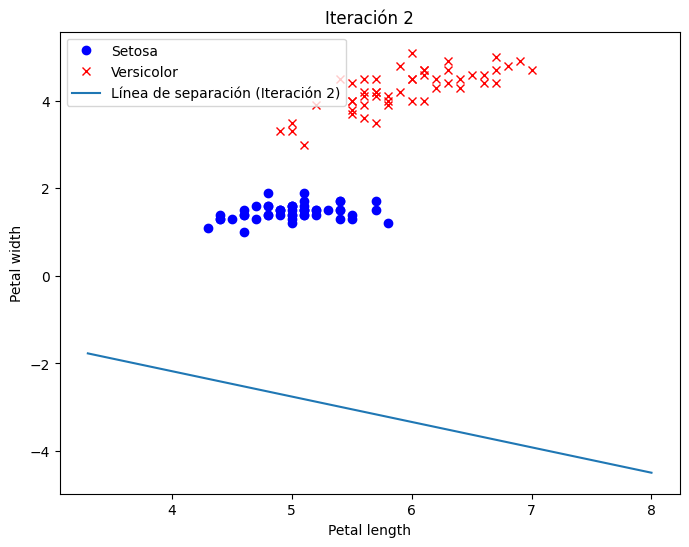

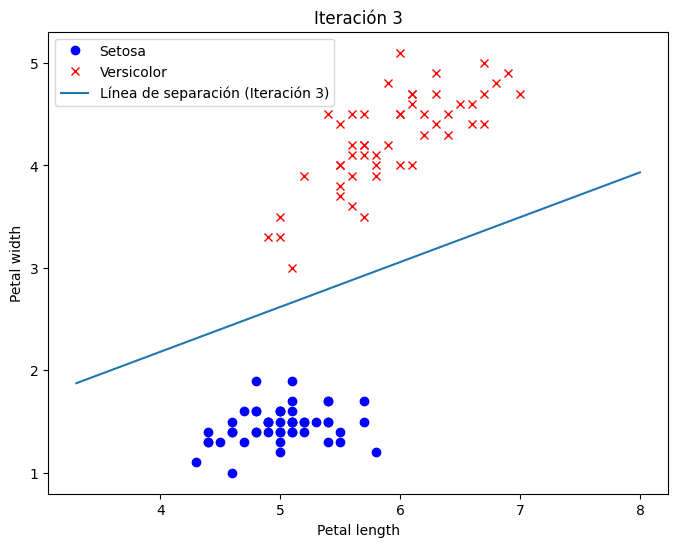

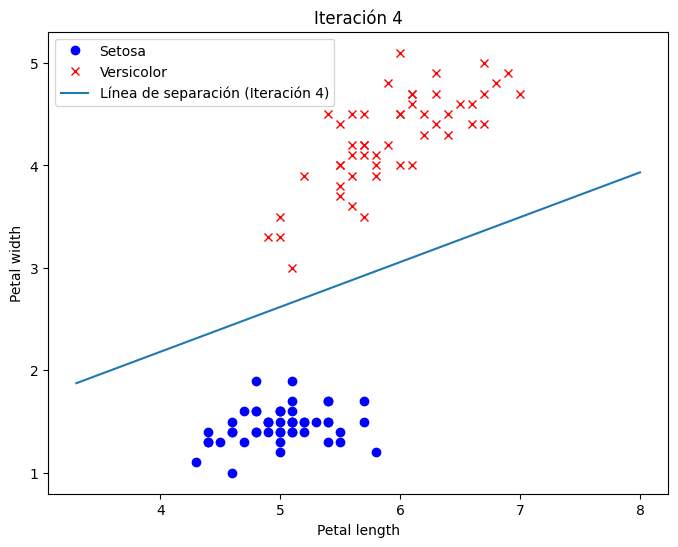

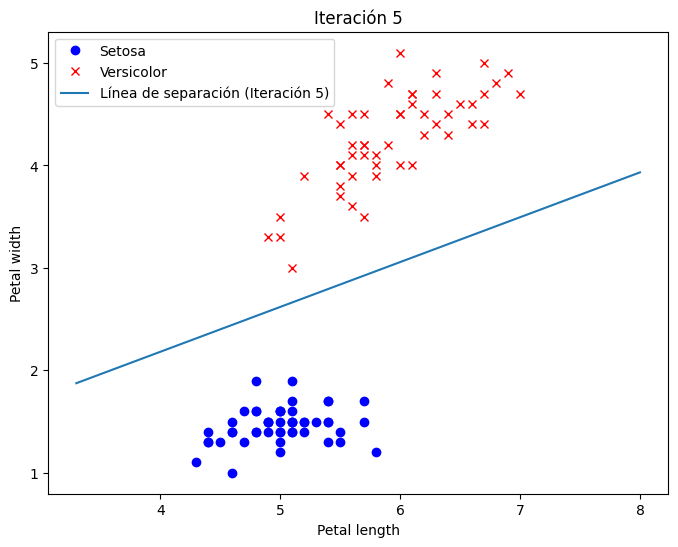

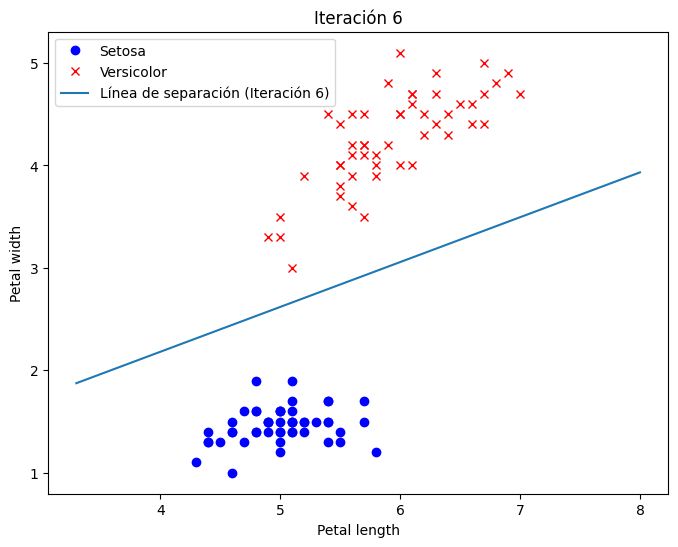

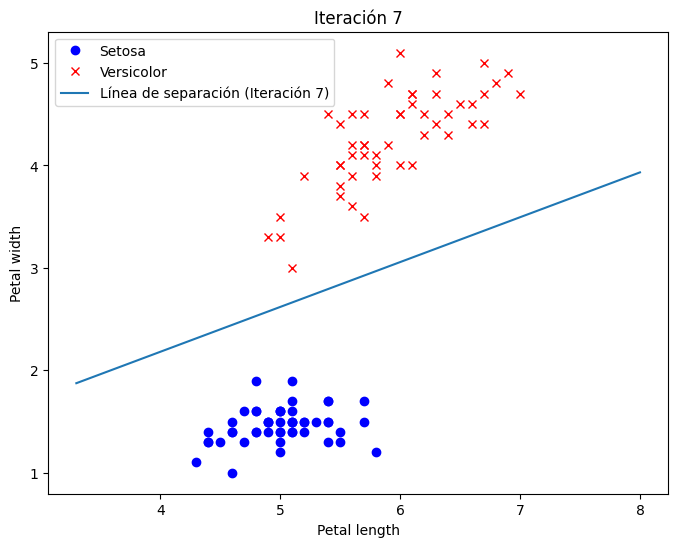

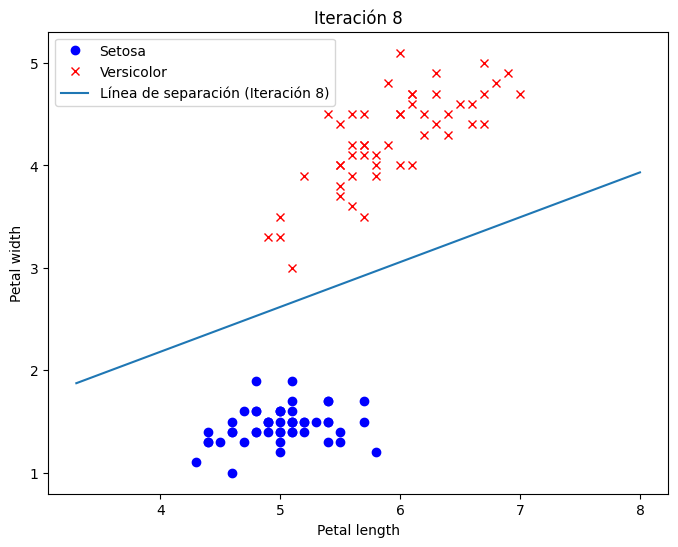

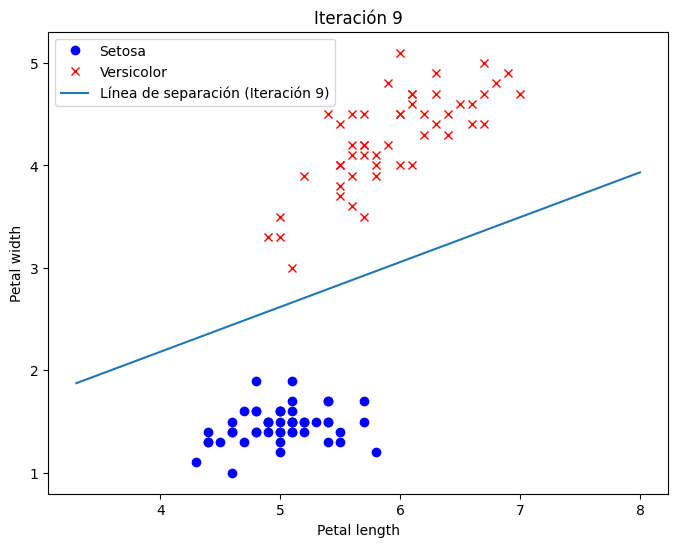

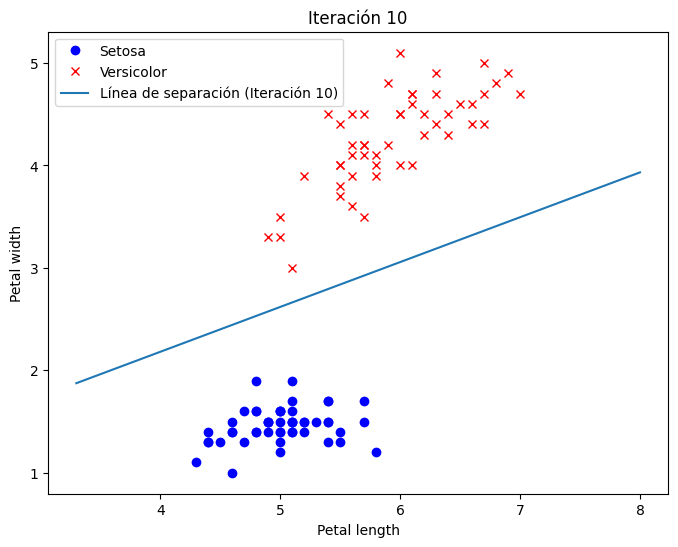

In [5]:
# Preparar los datos
# Obtener los primeros 50 (Setosa) y los segundos 50 (Versicolor) con las primeras 2 características
X = df.iloc[0:100, [0,2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(eta=0.2, n_iter=10) # incializar el perceptron
ppn.fit(X, y) # Entrenamiento

## Visualizar errores

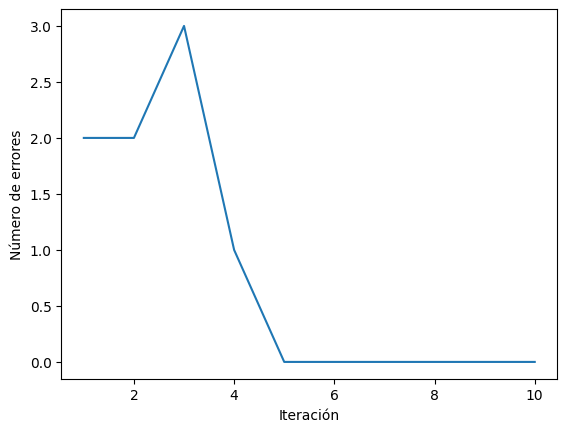

In [6]:
# Representación gráfica de los errores en función del número de iteraciones
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel("Iteración")
plt.ylabel("Número de errores")

plt.show()

In [ ]:
ppn.errors_

[2, 2, 3, 1, 0, 0, 0, 0, 0, 0]